## Some pictures of posters


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from const import MOVIE_ID, SIZE, GENRE, ID

DATA_DIR = "data"


def get_poster(movie_id: str) -> None:
    poster_path = os.path.join(DATA_DIR, os.path.join("posters", f"{movie_id}.jpg"))
    img = mpimg.imread(poster_path)
    return img


def plot_poster(movie_id: str) -> None:
    imgplot = plt.imshow(get_poster(movie_id))
    plt.show()

Saving 2000s.png
Saving 1960s.png
Saving 1980s.png
Saving 1950s.png
Saving 2020s.png
Saving 2010s.png
Saving 1970s.png
Saving 1990s.png


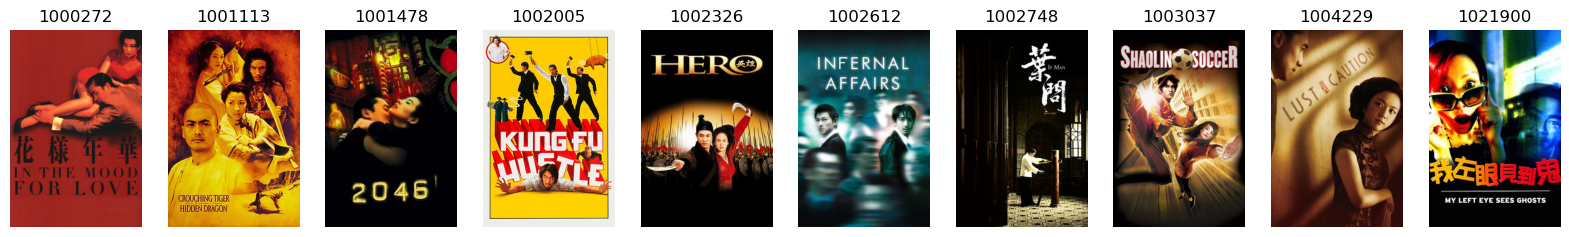

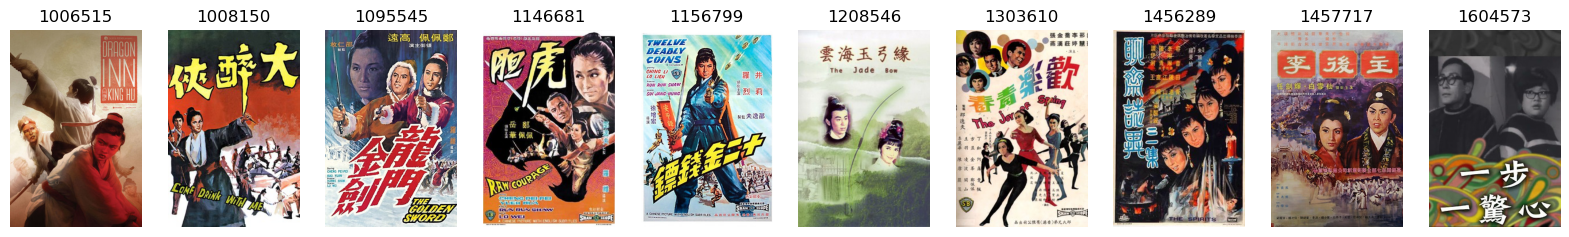

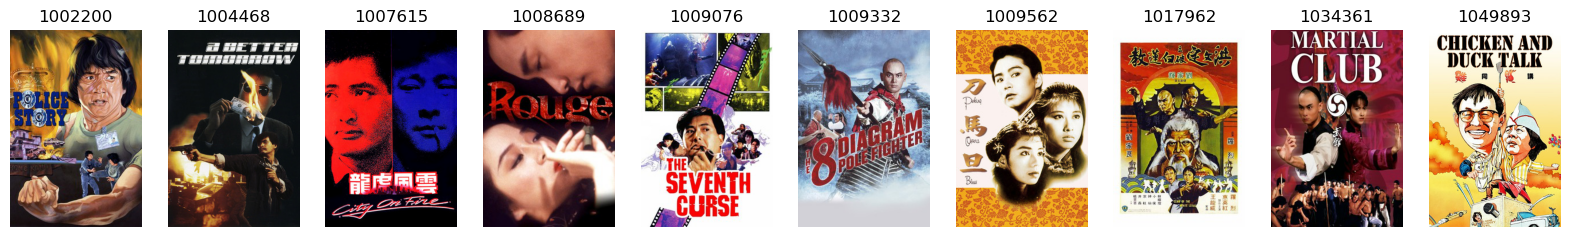

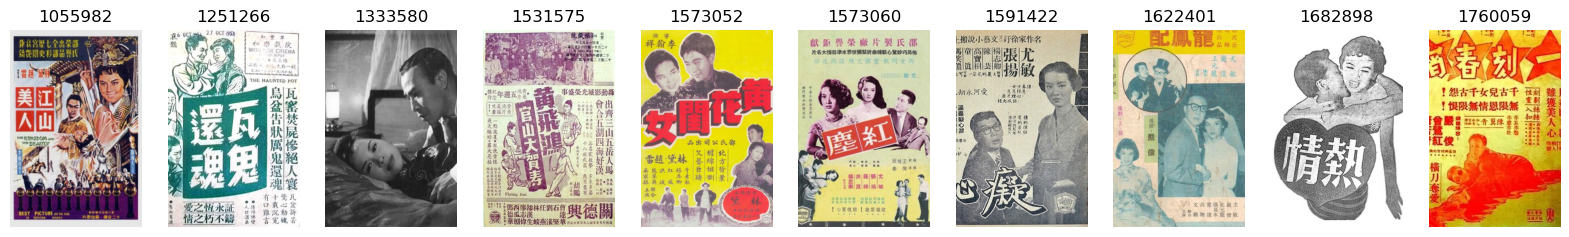

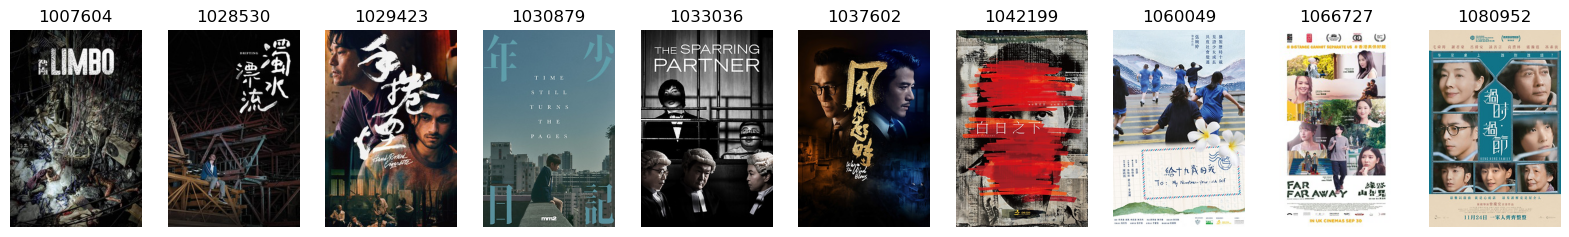

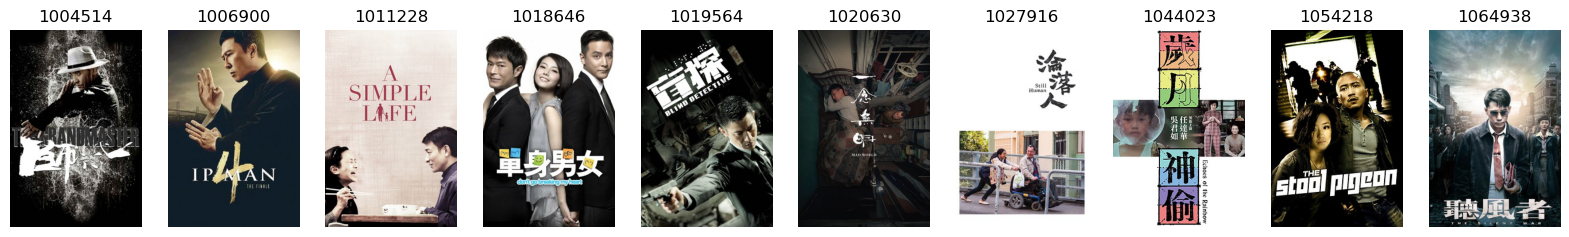

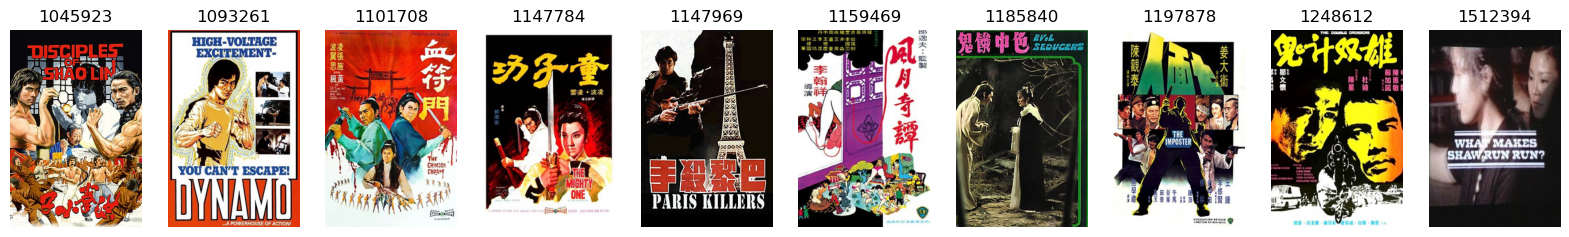

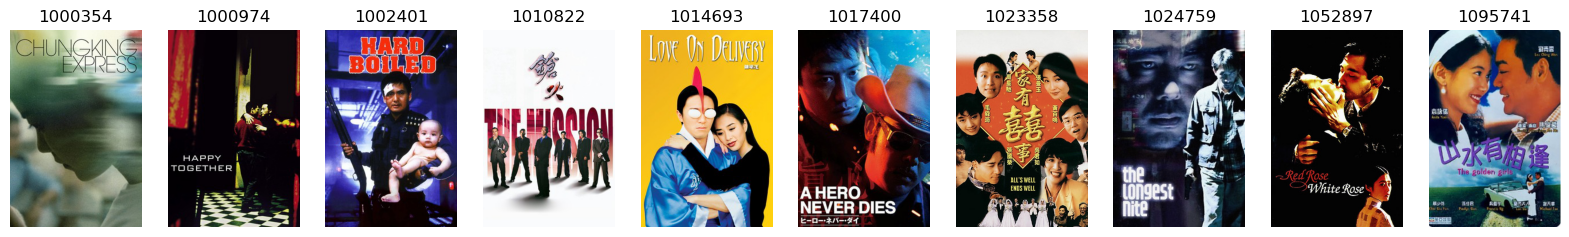

In [42]:
import os

import matplotlib.pyplot as plt

DIR = "by_decades_movies"


def save_posters(movie_ids, name):
    fig, ax = plt.subplots(1, len(movie_ids), figsize=(20, 3))
    # fig.subplots_adjust(wspace=0.01)

    for i, movie_id in enumerate(movie_ids):
        img = get_poster(movie_id)
        ax[i].axis("off")
        ax[i].imshow(img)
        ax[i].set_title(movie_id)
    print(f"Saving {name}.png")
    plt.plot()
    # fig.savefig(f"{name}.png")


for decade in os.listdir(DIR):
    movie_ids = sorted(
        list(
            map(
                int,
                map(lambda x: x.split(".")[0], os.listdir(os.path.join(DIR, decade))),
            )
        )
    )
    save_posters(movie_ids, decade)

## Basic Data Descriptions


### movies.csv


In [48]:
movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
movies

id                                     name    date  \
0       1000001                                   Barbie  2023.0   
1       1000002                                 Parasite  2019.0   
2       1000003        Everything Everywhere All at Once  2022.0   
3       1000004                               Fight Club  1999.0   
4       1000005                             Interstellar  2014.0   
...         ...                                      ...     ...   
896395  1896389                               伝七捕物帖 銀蛇呪文     NaN   
896396  1896390                          太阳的子民 Sa'icelen     NaN   
896397  1896391  柴咲コウ CONCERT TOUR 2023 ACTOR'S THE BEST     NaN   
896398  1896392                              相知相守民歌45演唱会     NaN   
896399  1896393             絶対BLになる世界VS絶対BLになりたくない男 2024     NaN   

                                                  tagline  \
0                        She's everything. He's just Ken.   
1                             Act like you own the place.   
2        The universe is so much bigger than you realize.   
3                                 Mischief. Mayhem. Soap.   
4       Mankind was born on Earth. It was never meant ...   
...                                                   ...   
896395                                                NaN   
896396                                                NaN   
896397                                                NaN   
896398                                                NaN   
896399                                                NaN   

                                              description  minute  rating  
0       Barbie and Ken are having the time of their li...   114.0    3.91  
1       All unemployed, Ki-taek's family takes peculia...   133.0    4.57  
2       An aging Chinese immigrant is swept up in an i...   140.0    4.32  
3       A ticking-time-bomb insomniac and a slippery s...   139.0    4.27  
4       The adventures of a group of explorers who mak...   169.0    4.32  
...                                                   ...     ...     ...  
896395  Kofu duty guard Yamauchi Hinata-kami cultivate...    98.0     NaN  
896396  The government's discriminatory policies, wars...    38.0     NaN  
896397  KO SHIBASAKI CONCERT TOUR 2023 - ACTOR'S THE BEST     NaN     NaN  
896398                                                NaN   262.0     NaN  
896399  One day, the protagonist realizes that he live...     NaN     NaN  

[896400 rows x 7 columns]

### genres.csv


In [49]:
genres = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
genres

id      genre
0       1000001     Comedy
1       1000001    Fantasy
2       1000001  Adventure
3       1000002     Comedy
4       1000002   Thriller
...         ...        ...
990765  1896380      Crime
990766  1896380      Drama
990767  1896382      Drama
990768  1896391      Music
990769  1896393   TV Movie

[990770 rows x 2 columns]

In [69]:
genre_dist

id
genre                  
Drama            219936
Documentary      153666
Comedy           134220
Animation         54701
Romance           49605
Horror            48688
Thriller          44201
Music             41871
Action            40291
Crime             33975
Family            26612
TV Movie          24596
Adventure         22281
Fantasy           21013
Mystery           20046
Science Fiction   19901
History           16217
War               10312
Western            8638

In [109]:
import plotly.express as px

genre_dist = genres.groupby(GENRE).count().sort_values(by=ID, ascending=False)

genre_dist_pie = px.pie(
    genre_dist,
    values="id",
    names=genre_dist.index,
    title="Movie Genre Distribution",
)
genre_dist_pie.update_layout(title_x=0.5)

genre_dist_pie.update_layout(
    legend=dict(orientation="h", yanchor="bottom", x=0.09, y=-0.2),
    width=600,
    height=800,
)
genre_dist_pie.show()

One movie can have multiple genres.

Let's see the genre counts by movie:


In [96]:
genre_counts = (
    genres.groupby(ID, as_index=False).count().sort_values(by=GENRE, ascending=False)
)
print(f"Least number of genres for a movie: {genre_counts['genre'].min()}")
print(f"Most number of genres for a movie: {genre_counts['genre'].max()}")

genre_counts_count = genre_counts.groupby(GENRE).count()
COUNT_GROUP = "count_group"
genre_counts_count[COUNT_GROUP] = genre_counts_count.index
genre_counts_count.loc[genre_counts_count.index >= 5, COUNT_GROUP] = ">4"
genre_counts_count_grouped = genre_counts_count.groupby(COUNT_GROUP).sum()

genre_counts_count_grouped_pie = px.pie(
    genre_counts_count_grouped,
    values="id",
    names=genre_counts_count_grouped.index,
    title="Groups of no. of genres - Pie Chart",
)
genre_counts_count_grouped_pie.update_layout(title_x=0.5)

genre_counts_count_grouped_pie.update_layout(
    legend=dict(orientation="h", yanchor="bottom", x=0.212525, y=-0.5),
    width=600,
    height=600,
)
genre_counts_count_grouped_pie.show()

Least number of genres for a movie: 1
Most number of genres for a movie: 16


/var/folders/6j/58m9_pf56jq0v8nb0c6cd4d00000gn/T/ipykernel_10636/3162680401.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '>4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Let's find out the movie ids and number of movies


In [18]:
number_of_movies = genres.id.unique().shape[0]
number_of_movies

638632

In [29]:
pd.set_option("display.float_format", lambda x: "%10.f" % x)

genres.describe()

id
count     990770
mean     1355200
std       252010
min      1000001
25%      1131709
50%      1316492
75%      1557642
max      1896393

Convert an int to a movie id:


In [43]:
# read the genres.csv file again for the function closure
genres_df = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
all_ids = genres_df.id.unique()
all_ids.sort()


def get_movie_id(id: int) -> str:
    return str(all_ids[id])

In [46]:
get_movie_id(200000)

'1216053'

## Some Picture Stats


In [73]:
from tqdm import tqdm

movie_sizes = {}
for movie in tqdm([get_movie_id(i) for i in range(number_of_movies)]):
    try:
        movie_sizes[movie] = get_poster(movie).shape
    except:
        pass

movie_sizes

100%|██████████| 638632/638632 [09:24<00:00, 1132.12it/s]


{'1000001': (345, 230, 3),
 '1000002': (345, 230, 3),
 '1000003': (345, 230, 3),
 '1000004': (345, 230, 3),
 '1000005': (345, 230, 3),
 '1000006': (345, 230, 3),
 '1000007': (345, 230, 3),
 '1000008': (345, 230, 3),
 '1000009': (345, 230, 3),
 '1000010': (345, 230, 3),
 '1000011': (345, 230, 3),
 '1000012': (345, 230, 3),
 '1000013': (345, 230, 3),
 '1000014': (345, 230, 3),
 '1000015': (345, 230, 3),
 '1000016': (345, 230, 3),
 '1000017': (345, 230, 3),
 '1000018': (345, 230, 3),
 '1000019': (345, 230, 3),
 '1000020': (345, 230, 3),
 '1000021': (345, 230, 3),
 '1000022': (345, 230, 3),
 '1000023': (345, 230, 3),
 '1000024': (345, 230, 3),
 '1000025': (345, 230, 3),
 '1000026': (345, 230, 3),
 '1000027': (345, 230, 3),
 '1000028': (345, 230, 3),
 '1000029': (345, 230, 3),
 '1000030': (345, 230, 3),
 '1000031': (345, 230, 3),
 '1000032': (345, 230, 3),
 '1000033': (345, 230, 3),
 '1000034': (345, 230, 3),
 '1000035': (345, 230, 3),
 '1000036': (345, 230, 3),
 '1000037': (345, 230, 3),
 

In [91]:
movie_sizes_df = pd.DataFrame(
    {MOVIE_ID: list(movie_sizes.keys()), SIZE: list(movie_sizes.values())}
)
movie_sizes_df.to_csv("movie_sizes.csv")

In [28]:
import pandas as pd

poster_sizes = pd.read_csv("poster_sizes.csv", index_col=0)
size_counts = poster_sizes.groupby(SIZE).count()
total_count = size_counts.sum().values
size_counts["size_group"] = size_counts.index
size_counts.loc[size_counts["movie_id"] < 10, "size_group"] = "others"
size_counts = size_counts.groupby("size_group").sum()
size_counts["relative_percentage"] = size_counts[MOVIE_ID] / total_count * 100
size_counts.sort_values(MOVIE_ID, ascending=False)

movie_id  relative_percentage
size_group                                  
(345, 230, 3)    552531            99.101767
(345, 230)         4203             0.753849
(344, 230, 3)       752             0.134878
(344, 230)           32             0.005740
others               21             0.003767

In [32]:
# all possible dimensions
poster_sizes.groupby(SIZE).count().shape

(19, 1)

In [70]:
# total number of posters
_, _, files = next(os.walk(os.path.join(DATA_DIR, "posters")))
file_count = len(files)
file_count

724541

Trim movies based on its size and whether its poster exists or not


In [139]:
most_frequent_sizes = movie_sizes_df[SIZE].mode()
most_frequent_sizes

0    (345, 230, 3)
Name: size, dtype: object

In [141]:
valid_movies = movie_sizes_df[movie_sizes_df["size"].isin(most_frequent_sizes)]
valid_movies[MOVIE_ID].to_csv("valid_movies.csv")